In [1]:
import warnings
warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)
from statsmodels.tools.sm_exceptions import ValueWarning
warnings.simplefilter('ignore', ValueWarning)
warnings.simplefilter('ignore', FutureWarning)


### VAR

In [2]:
import pandas as pd
import numpy as np
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('WeatherData.csv', index_col='Date', parse_dates=['Date'])

In [4]:
df = df.head(1000)

In [5]:
df.drop(columns = 'Unnamed: 0', inplace = True)

In [6]:
df = pd.get_dummies(df, columns=['Direction of Wind', 'Clouds'], drop_first=True)

In [7]:
def check_stationarity(series):
    result = adfuller(series)
    if result[1] > 0.05:
        print(f"{series.name} is not stationary")
    else:
        print(f"{series.name} is stationary")

for column in df.columns:
    check_stationarity(df[column])

Temperature (Min) is stationary
Temperature (Max) is stationary
Pressure is stationary
Velocity of Wind is stationary
Humidity is not stationary
Carbon Monoxide is not stationary
UV Rays is not stationary
Intensity of Light is stationary
Rainfall is stationary
Direction of Wind_NorthWest is stationary
Direction of Wind_SouthEast is stationary
Direction of Wind_SouthWest is stationary
Clouds_Altostratus is stationary
Clouds_Cirrocumulus is stationary
Clouds_Cirrostratus is stationary
Clouds_Cirrus is stationary
Clouds_Contrails is stationary
Clouds_Cumulonimbus is stationary
Clouds_Cumulus: Fluffy is stationary
Clouds_Lenticular Clouds is stationary
Clouds_Mammatus Clouds is stationary
Clouds_Nimbostratus is stationary
Clouds_Stratocumulus is stationary
Clouds_Stratus is stationary


In [8]:
df = df.diff().dropna()

In [9]:
for column in df.columns:
    check_stationarity(df[column])

Temperature (Min) is stationary
Temperature (Max) is stationary
Pressure is stationary
Velocity of Wind is stationary
Humidity is stationary
Carbon Monoxide is stationary
UV Rays is stationary
Intensity of Light is stationary
Rainfall is stationary
Direction of Wind_NorthWest is stationary
Direction of Wind_SouthEast is stationary
Direction of Wind_SouthWest is stationary
Clouds_Altostratus is stationary
Clouds_Cirrocumulus is stationary
Clouds_Cirrostratus is stationary
Clouds_Cirrus is stationary
Clouds_Contrails is stationary
Clouds_Cumulonimbus is stationary
Clouds_Cumulus: Fluffy is stationary
Clouds_Lenticular Clouds is stationary
Clouds_Mammatus Clouds is stationary
Clouds_Nimbostratus is stationary
Clouds_Stratocumulus is stationary
Clouds_Stratus is stationary


In [10]:
model = VAR(df.iloc[0:989])

lag_order = model.select_order(maxlags=5)
print(lag_order.summary())

 VAR Order Selection (* highlights the minimums) 
      AIC         BIC         FPE         HQIC   
-------------------------------------------------
0       67.18      67.30*   1.504e+29       67.23
1       65.01       67.99   1.713e+28      66.14*
2       64.45       70.30   9.812e+27       66.68
3      64.42*       73.13  9.538e+27*       67.73
4       64.55       76.12   1.098e+28       68.95
5       64.78       79.22   1.401e+28       70.27
-------------------------------------------------


In [11]:
model_fitted = model.fit(maxlags=5, ic='aic')

n_forecast_steps = 10 
forecast = model_fitted.forecast(df.iloc[0:989].values[-model_fitted.k_ar:], steps=n_forecast_steps)

forecast_df = pd.DataFrame(forecast, index=pd.date_range(start=df.iloc[0:989].index[-1], periods=n_forecast_steps + 1, closed='right'), columns=df.columns)

In [12]:
print(forecast_df['Rainfall']) 

1972-09-17    0.999183
1972-09-18   -0.576733
1972-09-19    0.469374
1972-09-20    0.006213
1972-09-21   -0.235691
1972-09-22    0.082648
1972-09-23    0.033987
1972-09-24    0.015170
1972-09-25   -0.076186
1972-09-26    0.049970
Freq: D, Name: Rainfall, dtype: float64


In [13]:
df['Rainfall'].tail(10)

Date
1972-09-17   -1.0
1972-09-18    1.0
1972-09-19    1.0
1972-09-20    2.0
1972-09-21   -3.0
1972-09-22    0.0
1972-09-23   -1.0
1972-09-24    2.0
1972-09-25   -2.0
1972-09-26    0.0
Name: Rainfall, dtype: float64

In [14]:
rmse_results = rmse(df['Rainfall'].tail(10), forecast_df['Rainfall'])
print(rmse_results)

1.6462090753959264


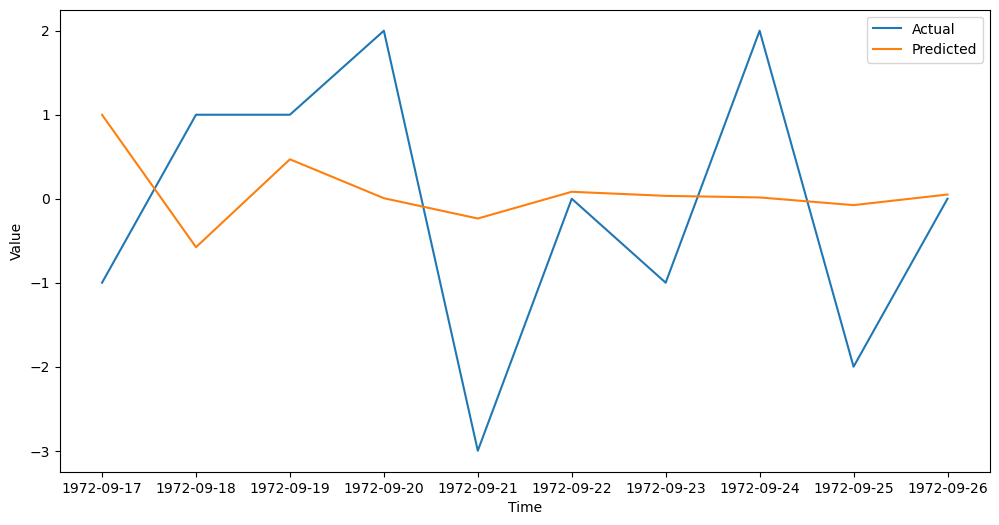

In [15]:
plt.figure(figsize=(12,6))
plt.plot(df.tail(10)['Rainfall'], label='Actual')
plt.plot(forecast_df['Rainfall'], label='Predicted')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

### VECM

In [16]:
import pandas as pd
import numpy as np
from statsmodels.tsa.api import VECM
from statsmodels.tsa.vector_ar.vecm import coint_johansen
from statsmodels.tools.eval_measures import rmse
import matplotlib.pyplot as plt

In [17]:
df = pd.read_csv('WeatherData.csv', index_col='Date', parse_dates=['Date'])
df = df.head(1000)

In [18]:
df.drop(columns = 'Unnamed: 0', inplace = True)
df = pd.get_dummies(df, columns=['Direction of Wind', 'Clouds'], drop_first=True)

In [19]:
def check_stationarity(series):
    result = adfuller(series)
    if result[1] > 0.05:
        print(f"{series.name} is not stationary")
    else:
        print(f"{series.name} is stationary")

for column in df.columns:
    check_stationarity(df[column])

Temperature (Min) is stationary
Temperature (Max) is stationary
Pressure is stationary
Velocity of Wind is stationary
Humidity is not stationary
Carbon Monoxide is not stationary
UV Rays is not stationary
Intensity of Light is stationary
Rainfall is stationary
Direction of Wind_NorthWest is stationary
Direction of Wind_SouthEast is stationary
Direction of Wind_SouthWest is stationary
Clouds_Altostratus is stationary
Clouds_Cirrocumulus is stationary
Clouds_Cirrostratus is stationary
Clouds_Cirrus is stationary
Clouds_Contrails is stationary
Clouds_Cumulonimbus is stationary
Clouds_Cumulus: Fluffy is stationary
Clouds_Lenticular Clouds is stationary
Clouds_Mammatus Clouds is stationary
Clouds_Nimbostratus is stationary
Clouds_Stratocumulus is stationary
Clouds_Stratus is stationary


In [20]:
def perform_johansen_test(data, det_order=0, k_ar_diff=1):
    result = coint_johansen(data, det_order, k_ar_diff)
    trace_stat = result.trace_stat
    crit_values = result.trace_stat_crit_vals
    eigenvalues = result.eig

    print("Johansen Cointegration Test Results:")
    print("------------------------------------")
    for r in range(len(trace_stat)):
        conclusion = "not rejected" if trace_stat[r] < crit_values[r, 1] else "rejected"
        print(f"Null hypothesis of rank = {r} is {conclusion}")
        print(f"Trace Statistic: {trace_stat[r]:.2f}, 95% Critical Value: {crit_values[r, 1]:.2f}")
        print(f"Eigenvalue: {eigenvalues[r]:.4f}\n")

perform_johansen_test(df) 

Johansen Cointegration Test Results:
------------------------------------
Null hypothesis of rank = 0 is rejected
Trace Statistic: 9661.67, 95% Critical Value: nan
Eigenvalue: 0.4493

Null hypothesis of rank = 1 is rejected
Trace Statistic: 9066.23, 95% Critical Value: nan
Eigenvalue: 0.4361

Null hypothesis of rank = 2 is rejected
Trace Statistic: 8494.45, 95% Critical Value: nan
Eigenvalue: 0.4230

Null hypothesis of rank = 3 is rejected
Trace Statistic: 7945.60, 95% Critical Value: nan
Eigenvalue: 0.4056

Null hypothesis of rank = 4 is rejected
Trace Statistic: 7426.48, 95% Critical Value: nan
Eigenvalue: 0.3995

Null hypothesis of rank = 5 is rejected
Trace Statistic: 6917.52, 95% Critical Value: nan
Eigenvalue: 0.3861

Null hypothesis of rank = 6 is rejected
Trace Statistic: 6430.52, 95% Critical Value: nan
Eigenvalue: 0.3828

Null hypothesis of rank = 7 is rejected
Trace Statistic: 5948.92, 95% Critical Value: nan
Eigenvalue: 0.3718

Null hypothesis of rank = 8 is rejected
Trace 

C:\Users\suler\anaconda3\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:648: HypothesisTestWarning: Critical values are only available for time series with 12 variables at most.
  warnings.warn(


In [21]:
vecm = VECM(df.iloc[0:990], k_ar_diff=1, coint_rank=1)  

In [22]:
vecm

In [23]:
vecm_fitted = vecm.fit()

In [24]:
vecm_fitted

In [25]:
n_forecast_steps = 10  
forecast, lower, upper = vecm_fitted.predict(n_forecast_steps, alpha=0.05)

forecast_df = pd.DataFrame(forecast, index=pd.date_range(start=df.iloc[0:990].index[-1], 
                           periods=n_forecast_steps + 1, closed='right'), 
                           columns=df.iloc[0:990].columns)

In [26]:
print(forecast_df['Rainfall'])  

1972-09-17    22.488044
1972-09-18    22.810438
1972-09-19    22.548807
1972-09-20    22.623835
1972-09-21    22.576450
1972-09-22    22.634415
1972-09-23    22.591064
1972-09-24    22.614784
1972-09-25    22.601411
1972-09-26    22.610067
Freq: D, Name: Rainfall, dtype: float64


In [27]:
df['Rainfall'].tail(10)

Date
1972-09-17    21.0
1972-09-18    22.0
1972-09-19    23.0
1972-09-20    25.0
1972-09-21    22.0
1972-09-22    22.0
1972-09-23    21.0
1972-09-24    23.0
1972-09-25    21.0
1972-09-26    21.0
Name: Rainfall, dtype: float64

In [28]:
rmse_results = rmse(df['Rainfall'].tail(10), forecast_df['Rainfall'])
print(rmse_results)

1.3150022709566052


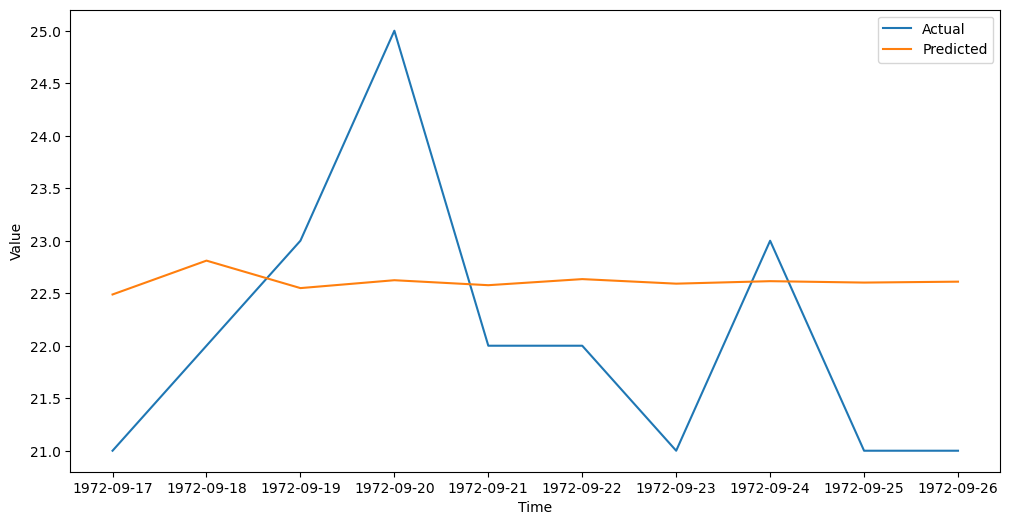

In [29]:
plt.figure(figsize=(12,6))
plt.plot(df.tail(10)['Rainfall'], label='Actual')
plt.plot(forecast_df['Rainfall'], label='Predicted')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

### VARMAX

In [30]:
import pandas as pd
from statsmodels.tsa.statespace.varmax import VARMAX
from statsmodels.tsa.stattools import adfuller
from pmdarima import auto_arima
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from math import sqrt

In [31]:
df = pd.read_csv('WeatherData.csv', index_col='Date', parse_dates=['Date'])

In [32]:
endog = df.loc['2010-01-01':'2023-10-20', ['Pressure', 'Velocity of Wind', 'Carbon Monoxide', 'Rainfall']]

In [33]:
exog = endog['Rainfall']
mod = VARMAX(endog[['Pressure', 'Velocity of Wind', 'Carbon Monoxide']], order=(2,0), trend='n', exog=exog)
res = mod.fit(maxiter=1000, disp=False)

In [34]:
res.summary()

Dep. Variable:,"['Pressure', 'Velocity of Wind', 'Carbon Monoxide']",No. Observations:,5041
Model:,VARX(2),Log Likelihood,-19871.244
Date:,"Tue, 12 Dec 2023",AIC,39796.488
Time:,05:31:12,BIC,39972.672
Sample:,01-01-2010,HQIC,39858.212
,- 10-20-2023,,
Covariance Type:,opg,,
Ljung-Box (L1) (Q):,"664.74, 4912.17, 0.61",Jarque-Bera (JB):,"14.90, 787.99, 2463080046.77"
Prob(Q):,"0.00, 0.00, 0.44",Prob(JB):,"0.00, 0.00, 0.00"
Heteroskedasticity (H):,"2.18, 2.46, 1.16",Skew:,"-0.01, 0.95, -50.98"
Prob(H) (two-sided):,"0.00, 0.00, 0.00",Kurtosis:,"3.27, 3.39, 3425.90"


In [35]:
predictions = res.predict(start=endog.index[0], end=endog.index[-1], exog=exog)

In [36]:
predictions, endog[['Pressure', 'Velocity of Wind', 'Carbon Monoxide']]

(               Pressure  Velocity of Wind  Carbon Monoxide
 2010-01-01   729.611908         18.438828         0.460916
 2010-01-02   708.760128          6.895492         0.484363
 2010-01-03   735.045870          4.685985         0.510500
 2010-01-04   735.048840          4.687553         0.510497
 2010-01-05   735.052199          4.689223         0.510494
 ...                 ...               ...              ...
 2023-10-16  1015.561805         62.449647         0.519225
 2023-10-17   842.189700         58.053153         0.410082
 2023-10-18   876.952361         58.976631         0.431829
 2023-10-19   842.360261         58.133713         0.409942
 2023-10-20   842.446192         58.174048         0.409872
 
 [5041 rows x 3 columns],
             Pressure  Velocity of Wind  Carbon Monoxide
 Date                                                   
 2010-01-01     712.0          3.068757         0.499999
 2010-01-02     712.0          3.070291         0.500001
 2010-01-03     712.0   

In [38]:
rmse_values = {}
for column in ['Pressure', 'Velocity of Wind', 'Carbon Monoxide']:
    rmse = sqrt(mean_squared_error(endog[column], predictions[column]))
    rmse_values[column] = rmse

print("RMSE values:")
for var, value in rmse_values.items():
    print(f"{var}: {value}")


RMSE values:
Pressure: 68.94309221068534
Velocity of Wind: 2.5266499786465606
Carbon Monoxide: 0.042084851085070714
